# Explore here

In [ ]:
# Cargo los paquetes que utilizaré
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Cargo la base de datos
bbdd = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
df = pd.DataFrame (bbdd)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [6]:
df.shape

(3140, 108)

In [7]:
# Quito duplicados
df2 = df.drop_duplicates(subset = df.columns)
print (f'Se encontraron {df.shape[1] - df2.shape[1]} observaciones duplicadas')

Se encontraron 0 observaciones duplicadas


In [9]:
# Verifico valores nulos
df.isna().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


#### Análisis exploratorio de datos

In [14]:
round(df.describe())

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,...,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0
mean,30402.0,104189.0,12740.0,12.0,13368.0,13.0,14469.0,12.0,13916.0,12.0,...,5827.0,13.0,12.0,14.0,9327.0,3.0,3.0,4.0,2466.0,5.0
std,15151.0,333583.0,41807.0,2.0,42284.0,2.0,49578.0,3.0,48991.0,2.0,...,15721.0,3.0,3.0,3.0,29755.0,1.0,1.0,1.0,7730.0,2.0
min,1001.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,6.0,...,7.0,6.0,6.0,7.0,11.0,2.0,2.0,2.0,3.0,1.0
25%,18180.0,10963.0,1280.0,11.0,1374.0,12.0,1264.0,10.0,1233.0,11.0,...,815.0,11.0,10.0,12.0,1188.0,3.0,3.0,3.0,315.0,3.0
50%,29178.0,25800.0,3057.0,12.0,3274.0,13.0,3108.0,12.0,3000.0,12.0,...,1964.0,13.0,12.0,14.0,2743.0,3.0,3.0,4.0,718.0,5.0
75%,45082.0,67913.0,8097.0,13.0,8822.0,14.0,8976.0,13.0,8314.0,13.0,...,4727.0,15.0,14.0,16.0,6679.0,4.0,4.0,4.0,1776.0,6.0
max,56045.0,10105518.0,1208253.0,25.0,1239139.0,23.0,1557073.0,38.0,1501844.0,22.0,...,434075.0,26.0,24.0,27.0,952335.0,6.0,6.0,7.0,237766.0,6.0


In [15]:
df.describe(include = object)

,COUNTY_NAME,STATE_NAME
count,3140,3140
unique,1841,51
top,Washington,Texas
freq,31,254


In [23]:
# Agrupo por tipos de variables
var_numericas = df.select_dtypes (include = ['float64', 'int64']).columns.tolist()
var_categoricas = df.select_dtypes (include = ['object']).columns.tolist()

for i in var_numericas:
    print(i)

fips
TOT_POP
0-9
0-9 y/o % of total pop
19-Oct
10-19 y/o % of total pop
20-29
20-29 y/o % of total pop
30-39
30-39 y/o % of total pop
40-49
40-49 y/o % of total pop
50-59
50-59 y/o % of total pop
60-69
60-69 y/o % of total pop
70-79
70-79 y/o % of total pop
80+
80+ y/o % of total pop
White-alone pop
% White-alone
Black-alone pop
% Black-alone
Native American/American Indian-alone pop
% NA/AI-alone
Asian-alone pop
% Asian-alone
Hawaiian/Pacific Islander-alone pop
% Hawaiian/PI-alone
Two or more races pop
% Two or more races
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
Percent of adults completing some college 

In [40]:
# Identifico variablaes vinculadas a la salud
# Listas de variables
sociodemograficas = [
    'fips', 'TOT_POP', 'Total Population', 'county_pop2018_18 and older', 
    'Population Aged 60+', 'Percent of Population Aged 60+', 'Urban_rural_code',
    'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone',
    'Median_Household_Income_2018', 'Unemployment_rate_2018',
    'PCTPOVALL_2018', 'Med_HH_Income_Percent_of_State_Total_2018',
    'Active Physicians per 100000 Population 2018 (AAMC)',
]

salud = [
    'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence',
    'diabetes_prevalence', 'CKD_prevalence'
]

# Crear nuevos DataFrames
df_sd = df[sociodemograficas]
df_health = df[salud]

In [41]:
# Descriptivos de la variable objetivo: Heart disease_prevalence
df['y'] = df['Heart disease_prevalence']
df['y'].describe()

count    3140.000000
mean        8.607803
std         1.758587
min         3.500000
25%         7.400000
50%         8.600000
75%         9.800000
max        15.100000
Name: y, dtype: float64

In [53]:
# Creo conjunto de datos con variables sociodemograficas y variable objetivo
var_seleccion = sociodemograficas + ['Heart disease_prevalence']
print (var_seleccion)

['fips', 'TOT_POP', 'Total Population', 'county_pop2018_18 and older', 'Population Aged 60+', 'Percent of Population Aged 60+', 'Urban_rural_code', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Median_Household_Income_2018', 'Unemployment_rate_2018', 'PCTPOVALL_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Heart disease_prevalence']


In [55]:
# Creo un dataframe solo con variables sociodemograficas y la target seleccionada
dft = df[var_seleccion]
dft.rename(columns={'Heart disease_prevalence': 'y'}, inplace=True)
dft.head()

/tmp/ipykernel_3166/2117039509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft.rename(columns={'Heart disease_prevalence': 'y'}, inplace=True)


,fips,TOT_POP,Total Population,county_pop2018_18 and older,Population Aged 60+,Percent of Population Aged 60+,Urban_rural_code,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Median_Household_Income_2018,Unemployment_rate_2018,PCTPOVALL_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),y
0,1001,55601,55036,42438,10523,19.1,3,42660,76.725239,10915,19.630942,59338,3.6,13.8,119.0,217.1,7.9
1,1003,218022,203360,170912,53519,26.3,4,190301,87.285228,19492,8.940382,57588,3.6,9.8,115.5,217.1,7.8
2,1005,24881,26201,19689,6150,23.5,6,12209,49.069571,12042,48.398376,34382,5.2,30.9,68.9,217.1,11.0
3,1007,22400,22580,17813,4773,21.1,2,17211,76.834821,4770,21.294643,46064,4.0,21.8,92.3,217.1,8.6
4,1009,57840,57667,44448,13600,23.6,2,55456,95.878285,950,1.642462,50412,3.5,13.2,101.1,217.1,9.2


In [56]:
# Calcular la correlación de todas las variables con "
correlation = dft.corr()["y"].abs()
print (correlation)

fips                                                   0.007443
TOT_POP                                                0.300905
Total Population                                       0.298053
county_pop2018_18 and older                            0.299094
Population Aged 60+                                    0.282839
Percent of Population Aged 60+                         0.595762
Urban_rural_code                                       0.518151
White-alone pop                                        0.306858
% White-alone                                          0.011185
Black-alone pop                                        0.232599
% Black-alone                                          0.064700
Median_Household_Income_2018                           0.730513
Unemployment_rate_2018                                 0.388944
PCTPOVALL_2018                                         0.546347
Med_HH_Income_Percent_of_State_Total_2018              0.567248
Active Physicians per 100000 Population 

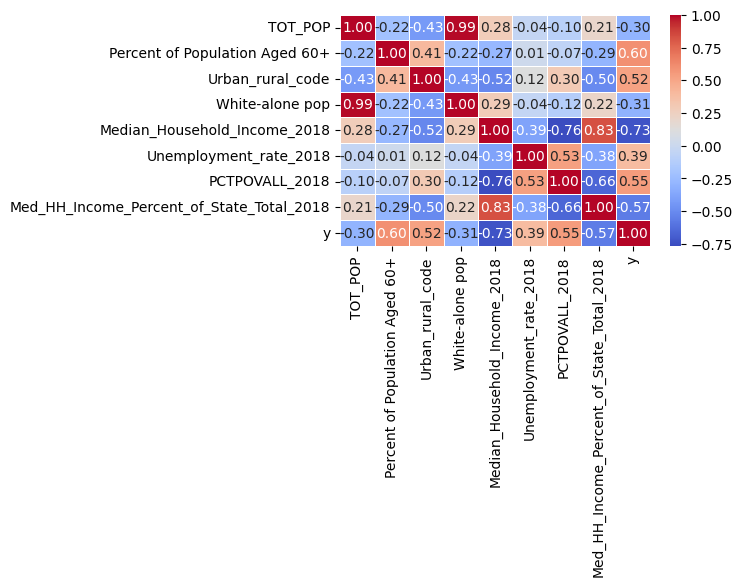

In [58]:
# Dado que son tantas variables, me quedo con las que correlacionan más fuerte con la objetivo (correlación mayor o igual a 0.4)
# Seleccionar solo las variables con correlación alta (mayor a 0.3 por ejemplo)
correlacion_fuerte = correlation[correlation > 0.3].index

# Crear un heatmap solo con estas variables
plt.figure(figsize=(5, 3))
sns.heatmap(df[correlacion_fuerte].corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Mostrar el gráfico
plt.show()

In [59]:
# Me quedo solo con las variables de correlacion fuerte (mayor a 0.3)
dft = dft[correlacion_fuerte]
dft.head()

,TOT_POP,Percent of Population Aged 60+,Urban_rural_code,White-alone pop,Median_Household_Income_2018,Unemployment_rate_2018,PCTPOVALL_2018,Med_HH_Income_Percent_of_State_Total_2018,y
0,55601,19.1,3,42660,59338,3.6,13.8,119.0,7.9
1,218022,26.3,4,190301,57588,3.6,9.8,115.5,7.8
2,24881,23.5,6,12209,34382,5.2,30.9,68.9,11.0
3,22400,21.1,2,17211,46064,4.0,21.8,92.3,8.6
4,57840,23.6,2,55456,50412,3.5,13.2,101.1,9.2


In [ ]:
# Descriptivos de nuevo dataframe
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   TOT_POP                                    3140 non-null   int64  
 1   Percent of Population Aged 60+             3140 non-null   float64
 2   Urban_rural_code                           3140 non-null   int64  
 3   White-alone pop                            3140 non-null   int64  
 4   Median_Household_Income_2018               3140 non-null   int64  
 5   Unemployment_rate_2018                     3140 non-null   float64
 6   PCTPOVALL_2018                             3140 non-null   float64
 7   Med_HH_Income_Percent_of_State_Total_2018  3140 non-null   float64
 8   y                                          3140 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 220.9 KB


In [ ]:
# Renombro variable debido a su extensión y paraque sea más acorde para gráficos
dft.rename(columns={'Med_HH_Income_Percent_of_State_Total_2018': 'MHH_income_state_18'}, inplace=True)


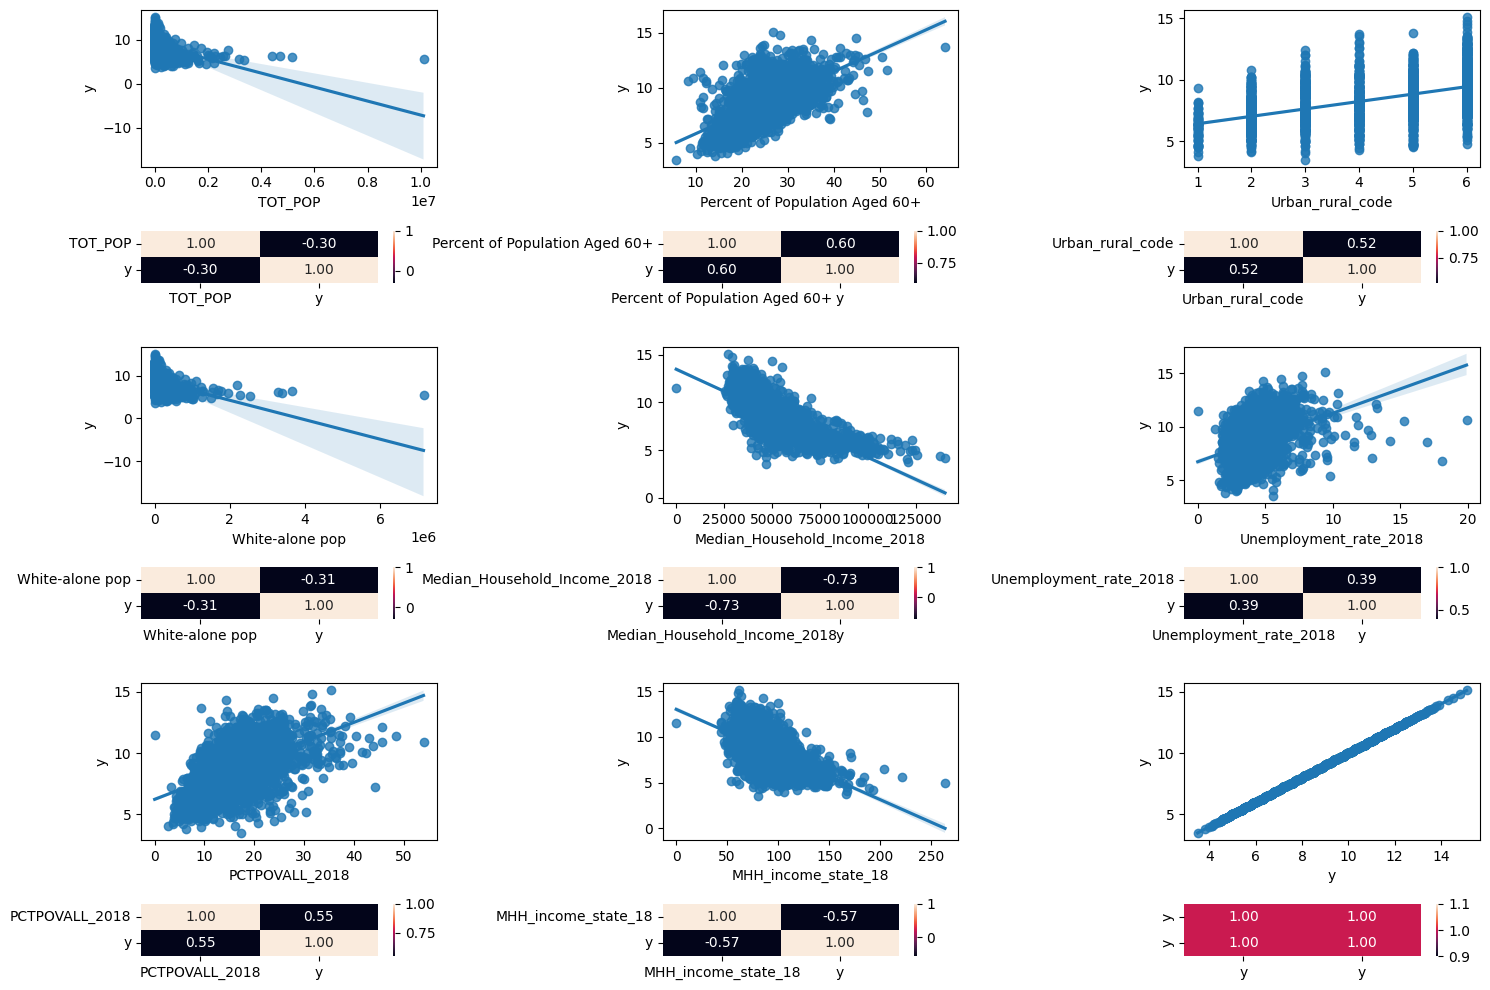

In [73]:
# Multivariado numéricas
col_3 = 3
row = int(np.ceil(len(dft.columns)/col_3))
total_rows = row * 2

fig, axis = plt.subplots (total_rows, col_3, figsize = (15, 10), gridspec_kw={'height_ratios': [12, 4] * row})

for i, var in enumerate(dft.columns):
    row, col = divmod(i, col_3)
    ax_reg = axis[row * 2, col]
    ax_cor = axis[row* 2+1, col]

    sns.regplot (ax = ax_reg, data = dft, x = var, y = 'y')
    sns.heatmap(ax=ax_cor, data=dft[[var, 'y']].corr(), annot=True, fmt='.2f')

plt.tight_layout()
plt.show()

#### Modelado

In [78]:
# Divido el conjunto de datos

from sklearn.model_selection import train_test_split

X = dft.drop(['y'], axis = 1)
y = dft['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)


(2512, 8) (2512,)


In [76]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos para mejor desempeño del descenso de gradiente
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
from sklearn.linear_model import Lasso

# Load of train and test data
# These data must have been standardized and correctly processed in a complete EDA

lasso_model = Lasso(alpha = 0.1, max_iter = 300)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.930e+02, tolerance: 7.676e-01
  model = cd_fast.enet_coordinate_descent(


In [101]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {round(mean_squared_error(y_test, y_pred_lasso),4)}")
print(f"Coeficiente de determinación: {round(r2_score(y_test, y_pred_lasso),4)}")

Error cuadrático medio: 0.7279
Coeficiente de determinación: 0.7744


In [86]:
from sklearn.linear_model import Ridge

# Load of train and test data
# These data must have been standardized and correctly processed in a complete EDA

ridge_model = Ridge(alpha = 0.1, max_iter = 500)

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

In [99]:

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_ridge)}")

Error cuadrático medio: 0.7180047671756857
Coeficiente de determinación: 0.7774465517300283


In [93]:

from sklearn.model_selection import RandomizedSearchCV

# We define the parameters we want to adjust
hyperparams = {
    "alpha": np.logspace(0.1, 1, 2),
    "max_iter": (100, 150, 200)
}

# We initialize the random search
random_search = RandomizedSearchCV(ridge_model, hyperparams, cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=Ridge(alpha=0.1, max_iter=500),
                   param_distributions={'alpha': array([ 1.25892541, 10.        ]),
                                        'max_iter': (100, 150, 200)},
                   random_state=42)

In [94]:
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

Best hyperparameters: {'max_iter': 100, 'alpha': np.float64(10.0)}


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [95]:
ridge_model2 = Ridge(alpha = 10, max_iter = 100)

ridge_model2.fit(X_train, y_train)

y_pred_ridge2 = ridge_model2.predict(X_test)

In [100]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_ridge2)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_ridge2)}")

Error cuadrático medio: 0.7179358593809442
Coeficiente de determinación: 0.7774679104563675


##### Luego de la hiperparametrizacion, el mejor modelo al que se llegó es con el método Ridge con un coeficiente de determinacion de 0.78 y un erro cuadratico medio de 0.72